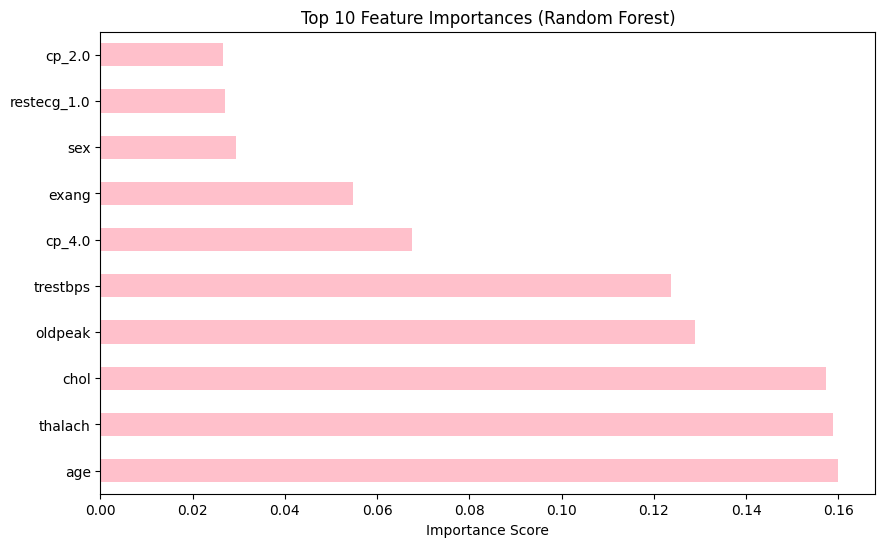

RFE Selected Features: ['sex', 'fbs', 'thalach', 'exang', 'oldpeak', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_1.0', 'restecg_2.0']
Chi-Square Selected Features: ['age', 'sex', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'cp_2.0', 'cp_3.0', 'cp_4.0']
Final selected features (13): ['thalach', 'sex', 'exang', 'chol', 'trestbps', 'age', 'cp_2.0', 'fbs', 'oldpeak', 'cp_3.0', 'restecg_1.0', 'cp_4.0', 'restecg_2.0']
Feature selection completed!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.linear_model import LogisticRegression

# Load data
df_encoded = pd.read_csv('data/heart_disease.csv')
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

# 1. Feature Importance using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
#visualization
plt.figure(figsize=(10,6))
feat_importances.head(10).plot(kind='barh', color='pink')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

# 2. Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=5000, solver="saga", random_state=42)
rfe = RFE(model, n_features_to_select=10)
#Trains the model, Removes the least important feature,Repeats until only 10 features remain
X_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.support_]
print("RFE Selected Features:", selected_features_rfe.tolist())

# 3. Chi-Square Test
X_chi2 = SelectKBest(score_func=chi2, k=10)
#SelectKBest: keeps the best k features, chi2: Chi-Square test (measures how strongly categorical features relate to the target),k=10: keep 10 features.
X_chi2_fit = X_chi2.fit_transform(X.abs(), y) 
 # ensure non-negative values
chi2_features = X.columns[X_chi2.get_support()]
print("Chi-Square Selected Features:", chi2_features.tolist())

# 4. Final reduced dataset 
selected_features = list(set(selected_features_rfe).union(set(chi2_features)))
#Takes the union of both methods (RFE features + Chi² features).
#Uses set to remove duplicates.
X_reduced = X[selected_features]
print(f"Final selected features ({len(selected_features)}): {selected_features}")
print("Feature selection completed!")